# Machine Learning 18: Polynomial Logistic Regression 

### 🔹 1. What is Logistic Regression?

* Logistic regression is a **classification algorithm** used when the target variable (output) is **binary** (e.g., yes/no, 0/1, pass/fail).
* Instead of predicting exact values (like linear regression), it predicts the **probability** of belonging to a certain class using the **sigmoid (logistic) function**.


### 🔹 2. Problem with Linear Decision Boundaries

* Basic logistic regression draws a **straight line (or hyperplane in higher dimensions)** to separate classes.
* This works well if the data is **linearly separable**.
* But what if data is **non-linear** (e.g., circular, spiral, or curved boundaries)? A straight line is not enough.


### 🔹 3. Polynomial Features

* To solve this, we **transform the input features** into higher-order polynomial terms.
* Example (2 features: $x_1, x_2$):

  * Original: $[x_1, x_2]$
  * Polynomial (degree 2): $[x_1, x_2, x_1^2, x_2^2, x_1x_2]$
  * Polynomial (degree 3): add $[x_1^3, x_2^3, x_1^2x_2, x_1x_2^2]$ etc.

By doing this, logistic regression can model **curved or complex decision boundaries**.


### 🔹 4. Polynomial Logistic Regression

* We apply **logistic regression** after expanding the dataset with polynomial features.
* The model can then **learn non-linear relationships** and draw non-linear boundaries.

**Mathematical Representation:**

$$
P(y=1|x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1^2 + \theta_4x_2^2 + \theta_5x_1x_2 + ...)}}
$$

Here, higher-degree terms help capture **curves and complex patterns**.


### 🔹 5. Advantages

- Captures non-linear patterns
- Simple to implement using scikit-learn (`PolynomialFeatures`)
- Still interpretable compared to neural networks


### 🔹 6. Limitations

-  Higher-degree polynomials can lead to **overfitting**
-  More features = higher computation cost
- May need **regularization** (L1/L2 penalty)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df= pd.read_csv('nonlinear_data_circles.csv')
df.head()

,x1,x2,label
0,0.160594,0.482602,1
1,1.198440,-0.542104,0
2,-0.618907,0.728517,0
3,1.070839,-0.340617,0
4,0.843196,-0.502865,0


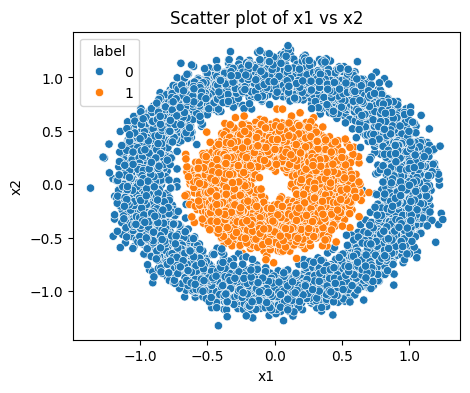

In [3]:
# Scatter plot
plt.figure(figsize=(5, 4))
sns.scatterplot(x="x1", y="x2", data=df, hue="label")
plt.title("Scatter plot of x1 vs x2")
plt.show()

In [4]:
# Features and target
X = df[['x1','x2']].values  # assuming columns are x1, x2
y = df['label'].values          # target column

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
# Generate polynomial features
poly = PolynomialFeatures(degree=3)  # You can change the degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
model = LogisticRegression()
model.fit(X_train_poly, y_train)

LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
y_pred = model.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9995
Confusion Matrix:
[[1012    1]
 [   0  987]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1013
           1       1.00      1.00      1.00       987

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [13]:
# Optional: Visualize the decision boundary (for 2D data only)
def plot_decision_boundary(X, y, degree = 1 ):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Degree = {}, Accuracy = {}'.format(3, np.round(accuracy, 4)))
    plt.show()


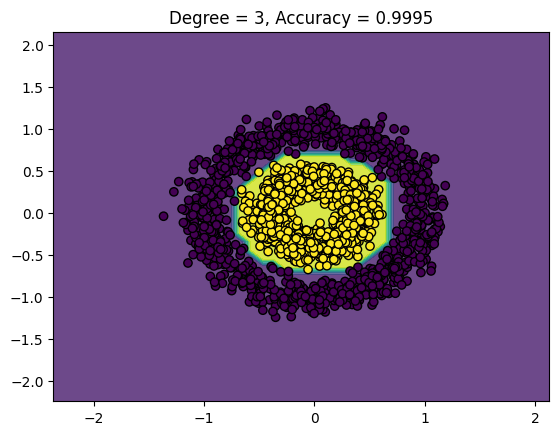

In [14]:
# Visualize the decision boundary
plot_decision_boundary(X_test, y_test)